# Que 6.Could you implement your own KNN function from scratch (without  calling any existing classifier packages)? Your own KNN function must have following parameters  to tune: n_neighbors, weights. Can you compare your own classifier with sklearn neighbors.KNeighborsClassifier in terms performance, complexity, etc. Data usage: datasets.load_iris() from sklearn.

In [1]:
from sklearn.datasets import load_iris #importing the iris dataset from SKlearn 
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler


## EDA

In [2]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df1 = pd.DataFrame(load_iris().target, columns=['Species'])
df = pd.concat([df,df1], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.columns= ["sepal_length", "sepal_width","petal_length","petal_width","species"] #changing the column names

In [4]:
df.info()
# checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.isnull().sum() # checking for null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [8]:
species_map={0:'setosa',1:'versicolor',2:'virginica'}
df["species_names"]= df["species"].apply(lambda x:species_map.get(x))
df= df.drop('species',axis=1)
df.species_names.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species_names, dtype: int64

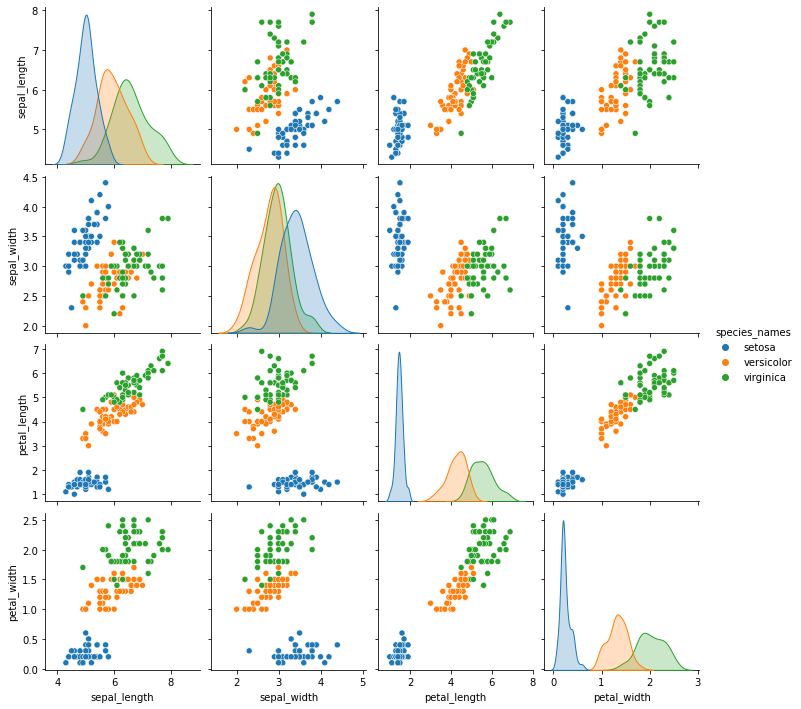

In [9]:
sns.pairplot(df,hue="species_names", kind="scatter")

In [10]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df1 = pd.DataFrame(load_iris().target, columns=['Species'])
df = pd.concat([df,df1], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Creating the KNN Function for K=4

In [11]:
X = data.data  
y = data.target

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
class KNN_Classifier: 
      
    def __init__( self, K ) :  # initialising Value of K neighbours
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
              
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
        
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.linalg.norm( x - x_train ) 
  

  
X_train1, X_test1, Y_train, Y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

# Model training

model = KNN_Classifier( K = 4)

model.fit( X_train, Y_train )




# Prediction on test set

Y_pred = model.predict( X_test )



# measure performance

correctly_classified = 0



# counter

count = 0

for count in range( np.size( Y_pred ) ) :

    if Y_test[count] == Y_pred[count] :

        correctly_classified = correctly_classified + 1



print( "The Accuracy of the  model:", round(( correctly_classified / count ) * 100.0,2) )


The Accuracy of the  model: 100.0


#### Confusion Matrix for Weighted KNN model

In [14]:
def confusion_mat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

# sample data
actual = Y_test
predicted = Y_pred

# confusion matrix
print(confusion_mat(actual, predicted))

[[16.  0.  0.]
 [ 0. 17.  1.]
 [ 0.  0. 11.]]


## Implementing the KNN Model using Sklearn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

In [17]:
knn= KNeighborsClassifier(n_neighbors = 4)

X_train_sklearn, X_test_sklearn, Y_train_sklearn, Y_test_sklearn = train_test_split( X, y, test_size = 0.3, random_state = 0 )

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_sklearn)
X_test_1 = scaler.transform(X_test_sklearn)



In [18]:
knn.fit(X_train_1, Y_train_sklearn)
y_pred= knn.predict(X_test_1)

Accuracy= accuracy_score(Y_test_sklearn,y_pred)

print("The accuracy of the model is :", round(Accuracy*100.0,2))

The accuracy of the model is : 97.78


#### Confusion Matrix

In [19]:
confusion_matrix(Y_test_sklearn,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

#### Classification Report

In [20]:
print(classification_report(Y_test_sklearn, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Model Complexity

In [21]:
train_accuracies = {}
test_accuracies = {}
import numpy as np
neighbors = np.arange(1, 26)
for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)   
    knn.fit(X_train_sklearn, Y_train_sklearn)    
    train_accuracies[neighbor] = knn.score(X_train_sklearn, Y_train_sklearn)    
    test_accuracies[neighbor] = knn.score(X_test_sklearn, Y_test_sklearn)


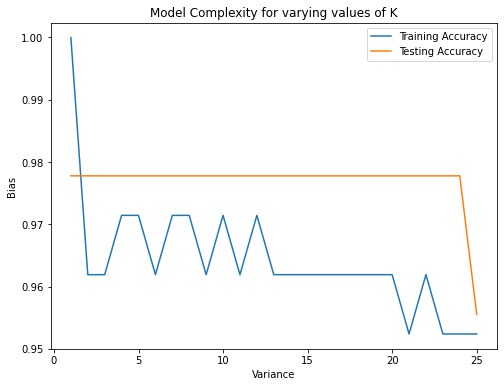

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title("Model Complexity for varying values of K")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Variance")
plt.ylabel("Bias")
plt.show()

#### Decision Boundaries

/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_90429/2413213104.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_90429/2413213104.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


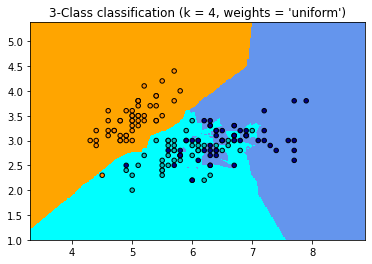

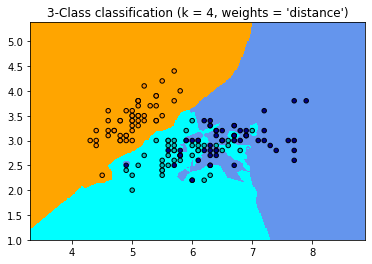

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 4

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### Observation

## Creating the 5 Fold Cross_Val Function 

In [24]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict_instance(self, test_instance):
        inputs = self.X_train.copy()
        # calculate distance between all training points and given test_point
        inputs['distance'] = np.linalg.norm(inputs.values-test_instance.values, axis=1)
        
        # concatenate inputs and labels before sorting the distances
        inputs = pd.concat([inputs, self.y_train], axis=1)

        # sort based on distance
        inputs = inputs.sort_values('distance', ascending=True)

        # pick k neighbors
        neighbors = inputs.head(self.K)

        # getting target from dataframe column
        classes = neighbors['Species'].tolist()
        
        from collections import Counter

        # create counter of labels
        majority_count = Counter(classes)
        
        return majority_count.most_common(1).pop()[0]
        
        
    def predict(self, X_test):
        predictions = np.zeros(X_test.shape[0])
        # we want out index to be start from 0
        X_test.reset_index(drop=True, inplace=True)
        for index, row in X_test.iterrows():
            predictions[index] = self.predict_instance(row)
        return predictions

def cross_validation(n, k, data, n_neighbors):
    """
    n : # iterations
    k : k-fold size
    data: training data
    n_neighbors: k in knn
    """
    accuracies = []
    
    for _ in range(0, n):
        # data shuffle
        data.sample(frac=1)
        
        fold=int(data.shape[0]/k)
        
        for j in range(k):
            test = data[j*fold:j*fold+fold]
            train = data[~data.index.isin(test.index)]
            X_train, y_train = train.drop('Species', axis=1), train['Species']
            X_test, y_test = test.drop('Species', axis=1), test['Species']
        
            

            
            knn = KNN(n_neighbors)
            knn.fit(X_train, y_train)
            
            predictions = knn.predict(X_test)
            true_values = y_test.to_numpy()
            accuracy = np.mean(predictions == true_values)
            
            accuracies.append(accuracy)
    return np.array(accuracies).mean()

In [25]:
k_values = np.arange(1, 10)
cross_validation_fold = 5
accuracies = []

In [26]:
for k in k_values:
    # run cross-validation with given neighbor size k
    accuracy = cross_validation(1, cross_validation_fold, df, k)
    accuracies.append(accuracy)
print(accuracies)

[0.9266666666666665, 0.9266666666666665, 0.9066666666666666, 0.9199999999999999, 0.9133333333333333, 0.9199999999999999, 0.9200000000000002, 0.9133333333333333, 0.9200000000000002]


Text(0.5, 0.98, 'Cross_val Score for different values of K')

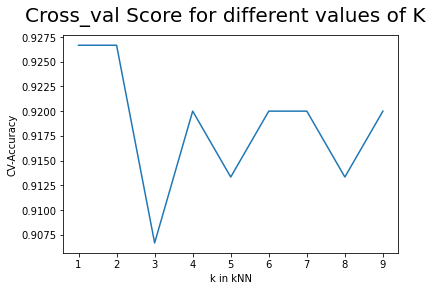

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig.suptitle('Cross_val Score for different values of K', fontsize=20)

## Implementing the 5 Fold Cross_Val through Sklearn 

In [28]:
accuracy_list=[]
def cross_val(K):
    from sklearn.model_selection import cross_val_score, KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    from sklearn.datasets import load_iris
    data = load_iris()
    X = data.data  
    y = data.target
    KNN = KNeighborsClassifier(K)
    
    cv_results = cross_val_score(KNN, X, y, cv=kf)

    
    print("For K= {0}, the 5- fold cross val score is given below:".format(K))
    
    print("scores are",cv_results)
    print("------------------------------------------------------------------")
    
    print("Mean is {0}, standard deviation is {1}".format(np.mean(cv_results), np.std(cv_results)))
    print("------------------------------------------------------------------")
    print("Confidence Interval is",np.quantile(cv_results, [0.025, 0.975]))
    print("------------------------------------------------------------------")
    
    print("\n")
    print("*******")
    return np.mean(cv_results)

                   
for i in range(1,10):
    x= cross_val(i)
    accuracy_list.append(x)
    


For K= 1, the 5- fold cross val score is given below:
scores are [1.         0.86666667 1.         1.         0.93333333]
------------------------------------------------------------------
Mean is 0.96, standard deviation is 0.053333333333333316
------------------------------------------------------------------
Confidence Interval is [0.87333333 1.        ]
------------------------------------------------------------------


*******
For K= 2, the 5- fold cross val score is given below:
scores are [0.96666667 0.83333333 1.         0.96666667 0.93333333]
------------------------------------------------------------------
Mean is 0.9400000000000001, standard deviation is 0.0573488351136175
------------------------------------------------------------------
Confidence Interval is [0.84333333 0.99666667]
------------------------------------------------------------------


*******
For K= 3, the 5- fold cross val score is given below:
scores are [0.96666667 0.86666667 1.         1.         0.93

Text(0.5, 0.98, 'Cross_val Score for different values of K')

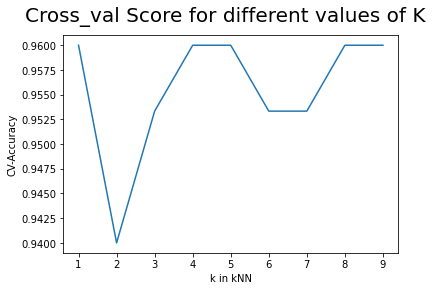

In [29]:
k_values= [1,2,3,4,5,6,7,8,9]
fig2 = plt.figure()
plt.plot(k_values, accuracy_list)
plt.xlabel('k in kNN')
plt.ylabel('CV-Accuracy')
fig2.suptitle('Cross_val Score for different values of K', fontsize=20)

## Creating the Weighted KNN Model for k = 4

In [30]:
class WeightedKNN: 
      
    def __init__( self, K ) :  # initialising Value of K neighbours
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # determining the class by max weights
            weight_1 = 0
            weight_2 = 0
            weight_0 = 0
            for t in neighbors:  # finding the max weights in different classes
                if t[0] == 1:
                    weight_1 += t[1] 
                elif t[0] ==2:
                    weight_2 += t[1]
                else:
                    weight_0 += t[1]
                    
            weight_dict= {weight_1 : 1, weight_2 : 2, weight_0 : 0} #creating dictionary for weight:class pair
            
            max_weight= max(weight_dict.keys()) #finding the key with max weight
           
              
            Y_predict[i] = weight_dict[max_weight]  # class with max weight
            
           
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        weights = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.weighted( x, self.X_train[i] )
              
            weights[i] = d
              
        # sort Y_train according to weights and 
        # store into Y_train_sorted in reverse order i.e. max weight(closest data point) will be placed first
          
        inds = weights.argsort()
        inds= inds[::-1]
        weights= weights[::-1]
          
        Y_train_reversed = self.Y_train[inds]
        
        weight_target = np.column_stack((Y_train_reversed,weights))
        
          
        return weight_target[:self.K]
      
    # Function to calculate euclidean distance
              
    def weighted( self, x, x_train ) :
          
        dist= np.linalg.norm( x - x_train ) # calculating the euclidean distanc
        
        square_distance= dist**2
        
        return 1/square_distance
  
 # Splitting dataset into train and test set

from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

X_train1, X_test1, Y_train, Y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)


# Model training

model = WeightedKNN( K = 4)

model.fit( X_train, Y_train )




# Prediction on test set

Y_pred = model.predict( X_test )



# measure performance

correctly_classified = 0



# counter

count = 0

for count in range( np.size( Y_pred ) ) :

    if Y_test[count] == Y_pred[count] :

        correctly_classified = correctly_classified + 1



print( "The accuracy of the model using weights is:  ", round(correctly_classified / count,2 ) * 100.0 )



The accuracy of the model using weights is:   93.0


#### Confusion Matrix for Weighted KNN model

In [31]:
def weight_confmat(actual, predicted):

    # extract the different classes
    classes = np.unique(actual)

    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))

    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):

           # count the number of instances in each combination of actual / predicted classes
           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

# sample data
actual = Y_test
predicted = Y_pred

# confusion matrix
print(weight_confmat(actual, predicted))

[[16.  0.  0.]
 [ 0. 15.  3.]
 [ 0.  1. 10.]]


## Implementing weighted KNN using Sklearn

In [32]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

knn= KNeighborsClassifier(n_neighbors = 4, weights= 'distance')

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 30)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

In [33]:
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

Accuracy= accuracy_score(y_test,y_pred)

print("The accuracy of the model is :", round(Accuracy*100.0,2))

The accuracy of the model is : 91.11


#### Confusion Matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 12]])

#### Observation

## Hyper-Parameter Tuning

### First Tuning with different values of K

In [35]:
class GridSearchCV: 
      
    def __init__( self, K ) :  # initialising Value of K neighbours
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
              
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
        
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.linalg.norm( x - x_train ) 
    

from sklearn.datasets import load_iris

data = load_iris()
X = data.data  
y = data.target

X_train1, X_test1, Y_train, Y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)



# Model training

for i in range(1,10):
    model = GridSearchCV( K = i )

    model.fit( X_train, Y_train )




    # Prediction on test set

    Y_pred = model.predict( X_test )



    # measure performance

    correctly_classified = 0


    # counter

    count = 0

    for count in range( np.size( Y_pred ) ) :

        if Y_test[count] == Y_pred[count] :

            correctly_classified = correctly_classified + 1



    print( "Accuracy on test set by our model for k = {0} is {1}:  ".format(i,( correctly_classified / count ) * 100.0 ))
    print("-----------------------------------------------------")



Accuracy on test set by our model for k = 1 is 95.45454545454545:  
-----------------------------------------------------
Accuracy on test set by our model for k = 2 is 97.72727272727273:  
-----------------------------------------------------
Accuracy on test set by our model for k = 3 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 4 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 5 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 6 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 7 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 8 is 100.0:  
-----------------------------------------------------
Accuracy on test set by our model for k = 9 is 100.0:  
----------------------------------------

### Creating Function for Hyperparameter Tuning for different values of neighbors and weights

In [36]:
class GridSearchCV1: 
      
    def __init__( self, K, W) :  # initialising Value of K neighbours
          
        self.K = K
        self.W= W
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
        
        if self.W== "uniform":
          
            for i in range( self.m_test ) :

                x = self.X_test[i]

                # find the K nearest neighbors from current test example

                neighbors = np.zeros( self.K )

                neighbors = self.find_neighbors( x )

                # most frequent class in K neighbors

                Y_predict[i] = mode( neighbors )[0][0]    

            return Y_predict
        
        elif self.W== "distance":
            for i in range( self.m_test ) :
              
                x = self.X_test[i]

                # find the K nearest neighbors from current test example

                neighbors = np.zeros( self.K )

                neighbors = self.find_neighbors( x )

                # determining the class by max weights
                weight_1 = 0
                weight_2 = 0
                weight_0 = 0
                for t in neighbors:  # finding the max weights in different classes
                    if t[0] == 1:
                        weight_1 += t[1] 
                    elif t[0] ==2:
                        weight_2 += t[1]
                    else:
                        weight_0 += t[1]

                weight_dict= {weight_1 : 1, weight_2 : 2, weight_0 : 0} #creating dictionary for weight:class pair

                max_weight= max(weight_dict.keys()) #finding the key with max weight


                Y_predict[i] = weight_dict[max_weight]  # class with max weight
            
           
              
            return Y_predict
            
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
        if self.W =="uniform":
          
            euclidean_distances = np.zeros( self.m )

            for i in range( self.m ) :

                d = self.euclidean( x, self.X_train[i] )

                euclidean_distances[i] = d

            # sort Y_train according to euclidean_distance_array and 
            # store into Y_train_sorted

            inds = euclidean_distances.argsort()

            Y_train_sorted = self.Y_train[inds]


            return Y_train_sorted[:self.K]
        
        elif self.W=="distance":
            
            weights = np.zeros( self.m )
          
            for i in range( self.m ) :

                d = self.euclidean( x, self.X_train[i] )

                weights[i] = d

            # sort Y_train according to weights and 
            # store into Y_train_sorted in reverse order i.e. max weight(closest data point) will be placed first

            inds = weights.argsort()
            inds= inds[::-1]
            weights= weights[::-1]

            Y_train_reversed = self.Y_train[inds]

            weight_target = np.column_stack((Y_train_reversed,weights))


            return weight_target[:self.K]
            
            
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
        
        if self.W== "uniform":
          
            return np.linalg.norm( x - x_train ) 
        
        elif self.W== "distance":
            
            dist= np.linalg.norm( x - x_train ) # calculating the euclidean distanc
        
            square_distance= dist**2

            return 1/square_distance
            
            
        
from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

 # Splitting dataset into train and test set
from sklearn.preprocessing import StandardScaler

  
X_train1, X_test1, Y_train, Y_test = train_test_split( 
  X, y, test_size = 0.3, random_state = 30 )
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)





In [37]:
K_val= [1,2,3,4,5,6,7,8,9,10]

Weight_val= ["uniform", "distance"]

max_accuracy_val=0
    
for n_val in K_val:
    for w in Weight_val:
        
        model1 = GridSearchCV1(n_val, w)

        model1.fit( X_train, Y_train )




        # Prediction on test set

        Y_pred = model1.predict( X_test )



        # measure performance

        correctly_classified = 0


        # counter

        count = 0

        for count in range( np.size( Y_pred ) ) :

            if Y_test[count] == Y_pred[count] :

                correctly_classified = correctly_classified + 1
    
        
        acc= ( correctly_classified / count )* 100.0
        
        if max_accuracy_val<acc:
            max_accuracy_val= acc
            Best_K= n_val
            Best_W= w


        print( "Accuracy on test set by our model for k = {0} is {1}:  ".format(n_val,( correctly_classified / count )* 100.0 ))
        print("the value of K is {0} and Weight is {1}".format(n_val,w))
        print("-----------------------------------------------------")
        print("\n")

        
print("**************************************")
print("The best accuracy is", max_accuracy_val)
print("The best value of K  is", Best_K)
print("The best value of Weight  is", Best_W)



Accuracy on test set by our model for k = 1 is 90.9090909090909:  
the value of K is 1 and Weight is uniform
-----------------------------------------------------


Accuracy on test set by our model for k = 1 is 90.9090909090909:  
the value of K is 1 and Weight is distance
-----------------------------------------------------


Accuracy on test set by our model for k = 2 is 93.18181818181817:  
the value of K is 2 and Weight is uniform
-----------------------------------------------------


Accuracy on test set by our model for k = 2 is 93.18181818181817:  
the value of K is 2 and Weight is distance
-----------------------------------------------------




/var/folders/fg/0cvyhxdj5v7503hv35z31yhr0000gn/T/ipykernel_90429/2145566147.py:153: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/square_distance


Accuracy on test set by our model for k = 3 is 93.18181818181817:  
the value of K is 3 and Weight is uniform
-----------------------------------------------------


Accuracy on test set by our model for k = 3 is 95.45454545454545:  
the value of K is 3 and Weight is distance
-----------------------------------------------------


Accuracy on test set by our model for k = 4 is 97.72727272727273:  
the value of K is 4 and Weight is uniform
-----------------------------------------------------


Accuracy on test set by our model for k = 4 is 93.18181818181817:  
the value of K is 4 and Weight is distance
-----------------------------------------------------


Accuracy on test set by our model for k = 5 is 93.18181818181817:  
the value of K is 5 and Weight is uniform
-----------------------------------------------------


Accuracy on test set by our model for k = 5 is 90.9090909090909:  
the value of K is 5 and Weight is distance
-----------------------------------------------------


Ac

### Hyperparameter Tuning for different values of neighbors and weights using Sklearn

#### Using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 30)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

metrics = ['euclidean'] 
neighbors = np.arange(1, 10)
weight=['uniform','distance']
param_grid  = dict(metric=metrics, n_neighbors=neighbors,weights=weight )

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X_train, y_train)
print("The best parameter is ",knn_cv.best_params_) 
print("The best accuracy score is ",knn_cv.best_score_)

The best parameter is  {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
The best accuracy score is  0.980952380952381


#### Using RandomSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.datasets import load_iris
data = load_iris()
X = data.data  
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state= 30)
metrics = ['euclidean'] 
neighbors = np.arange(1, 10)
weight=['uniform','distance']
param_grid  = dict(metric=metrics, n_neighbors=neighbors,weights=weight )

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_grid)
knn_cv.fit(X_train, y_train)
print("The best parameter is ",knn_cv.best_params_) 
print("The best accuracy score is ",knn_cv.best_score_)

The best parameter is  {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'euclidean'}
The best accuracy score is  0.980952380952381


#### Observation